# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
dataframes = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

In [5]:
for df in dataframes:
    print(df.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
for df in dataframes:
    print(df.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
for df in dataframes:
    print(df.duplicated().any())

False
False
False
False
False


In [8]:
for df in dataframes:
    print(df.isnull().any(), "\n")

Geographic Area    False
City               False
Median Income       True
dtype: bool 

Geographic Area    False
City               False
poverty_rate       False
dtype: bool 

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool 

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool 

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool 



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
for df in dataframes:
    df.fillna(0, inplace=True)

In [10]:
for df in dataframes:
    print(df.isnull().any(), "\n")

Geographic Area    False
City               False
Median Income      False
dtype: bool 

Geographic Area    False
City               False
poverty_rate       False
dtype: bool 

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool 

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool 

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool 



# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate, errors='coerce')

In [12]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


<AxesSubplot:ylabel='Geographic Area'>

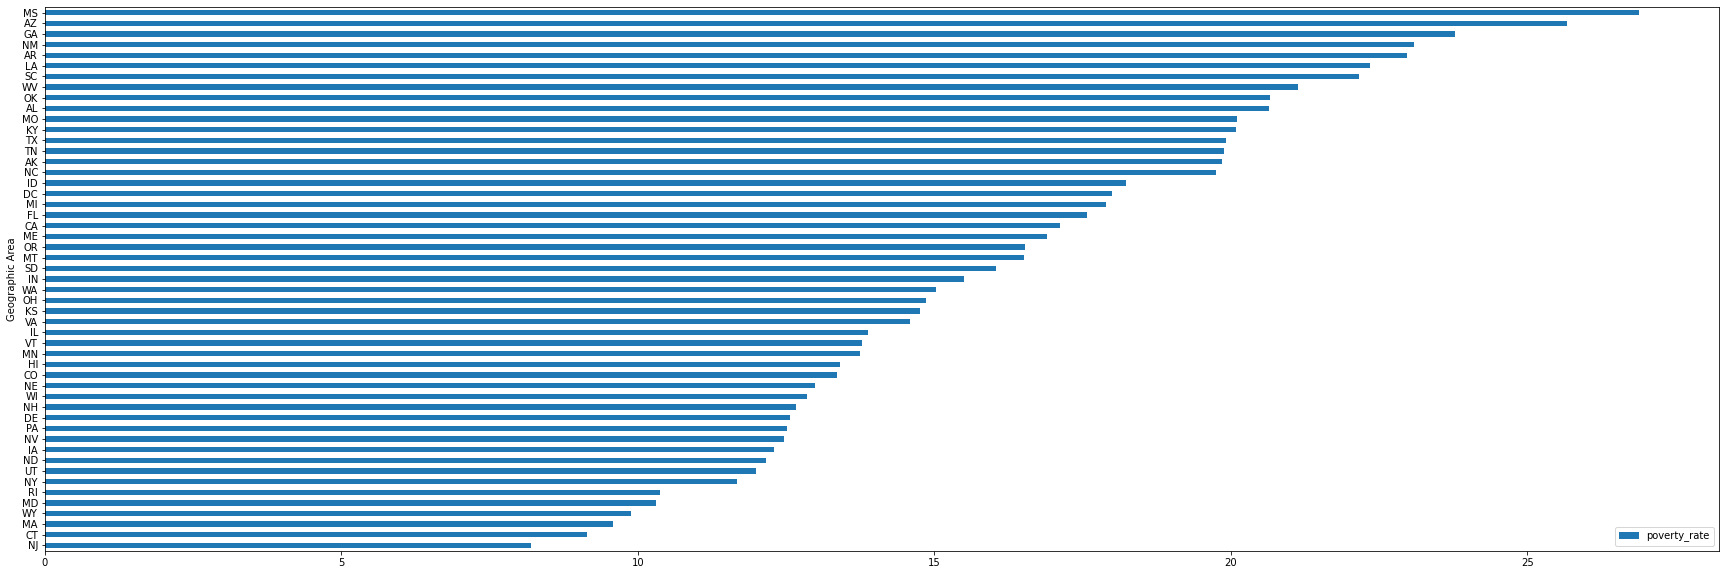

In [13]:
df_pct_poverty.groupby('Geographic Area').mean().sort_values(by='poverty_rate').plot(kind='barh', figsize=(30,10))

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [15]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs,
                                                         errors='coerce')

<AxesSubplot:ylabel='Geographic Area'>

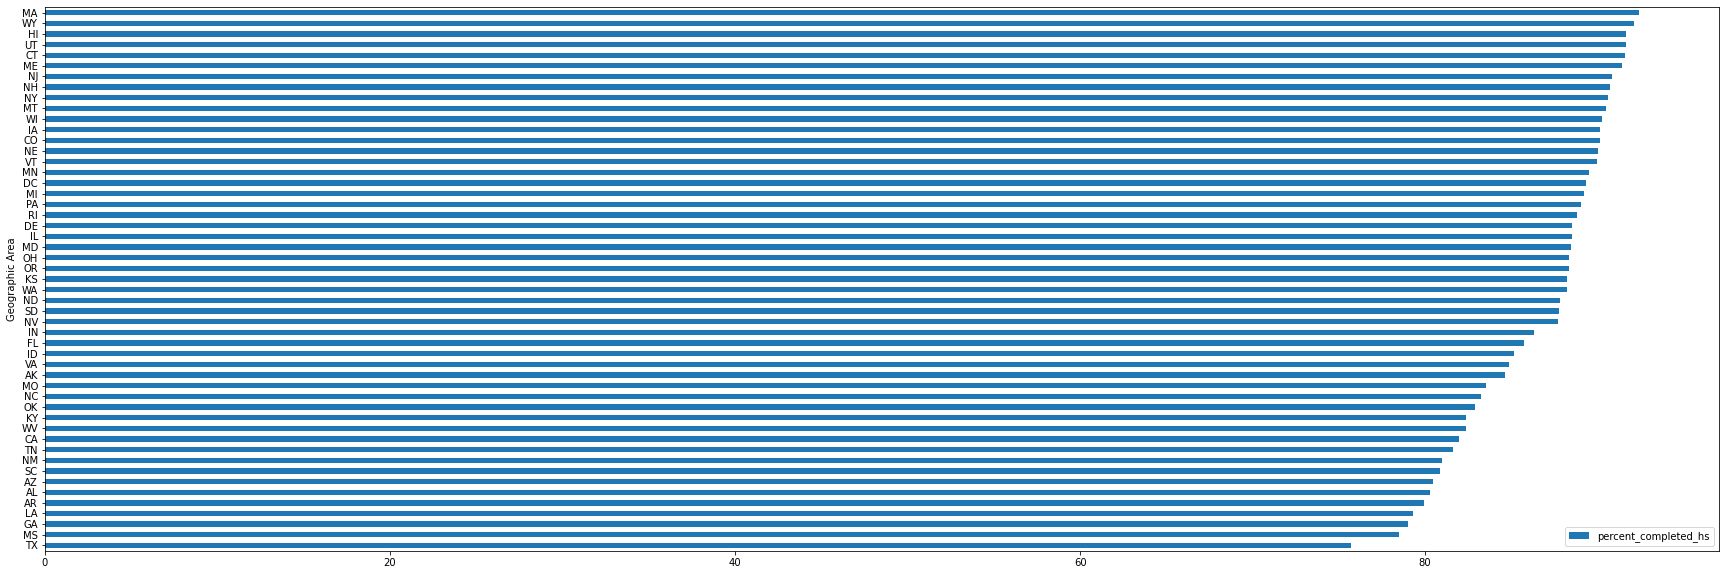

In [16]:
df_pct_completed_hs.groupby('Geographic Area').mean().sort_values(by='percent_completed_hs').plot(kind='barh',
                                                                                                  figsize=(30,10))

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [17]:
result = pd.merge(df_pct_poverty, df_pct_completed_hs, how="left", on=["Geographic Area", "City"])

In [18]:
result.head(1)

,Geographic Area,City,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,78.80,21.20


<AxesSubplot:xlabel='poverty_rate', ylabel='percent_completed_hs'>

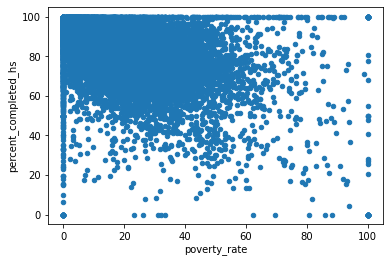

In [19]:
result.plot(x='poverty_rate',
            y='percent_completed_hs',
            kind='scatter')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

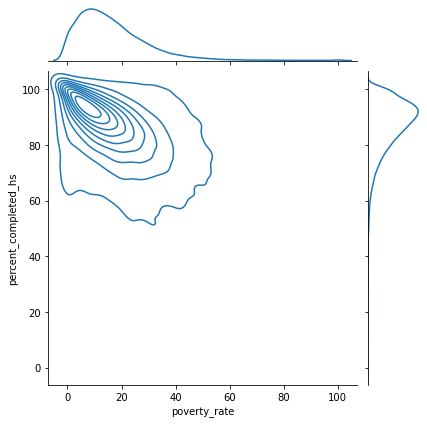

In [20]:
sns.jointplot(x='poverty_rate',
              y='percent_completed_hs',
              data=result,
              kind='kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

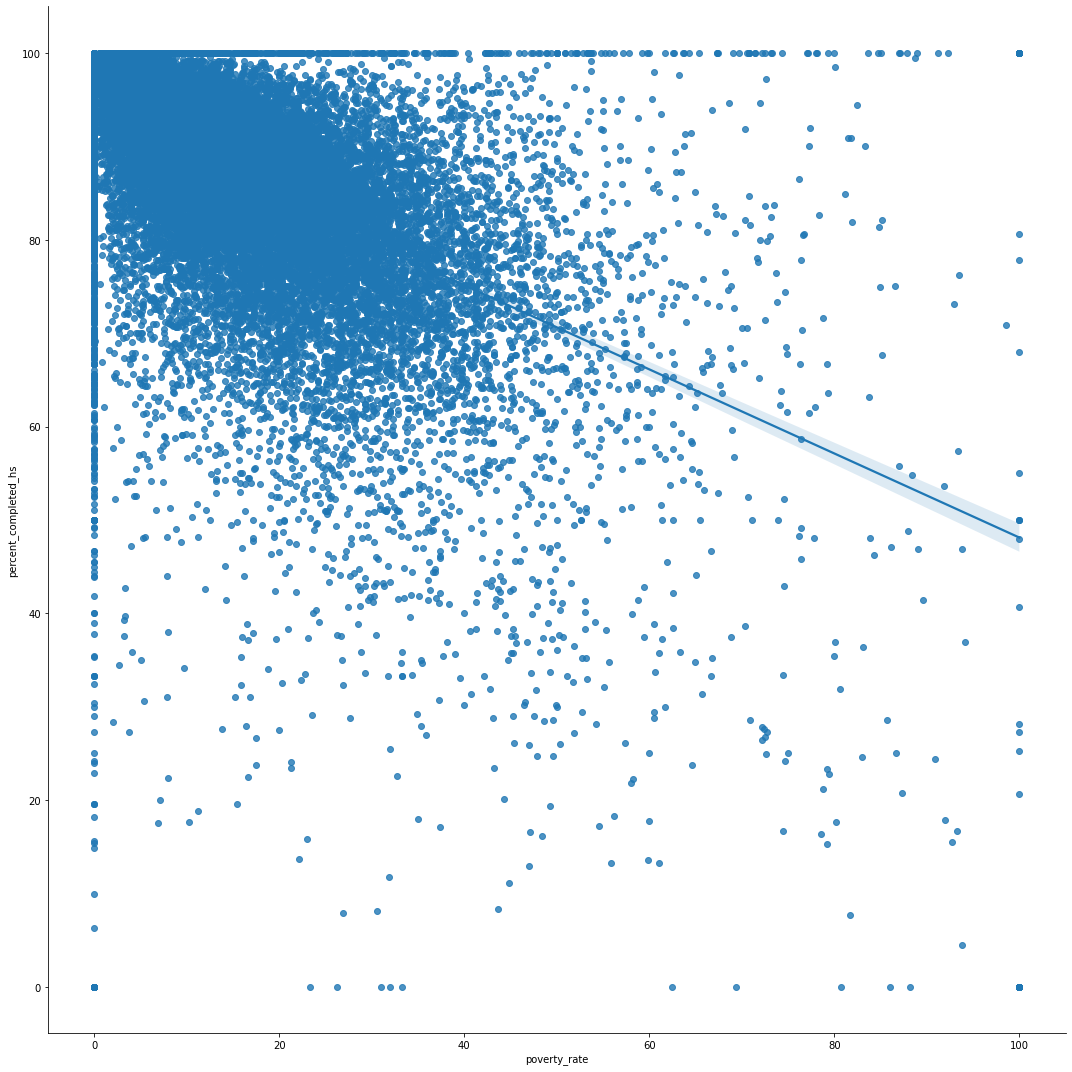

In [21]:
sns.lmplot(x='poverty_rate',
           y='percent_completed_hs',
           data=result,
           height=15)

<AxesSubplot:xlabel='poverty_rate', ylabel='percent_completed_hs'>

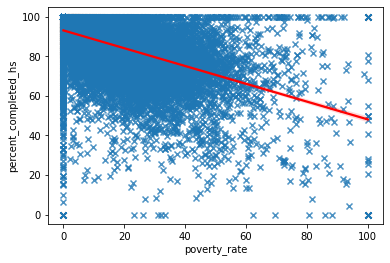

In [22]:
sns.regplot(x='poverty_rate',
            y='percent_completed_hs',
            data=result,
            marker='x',
            line_kws=dict(color="r"))

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [23]:
df_share_race_city.head(1)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6


In [24]:
cols=['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']

In [25]:
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:ylabel='Geographic area'>

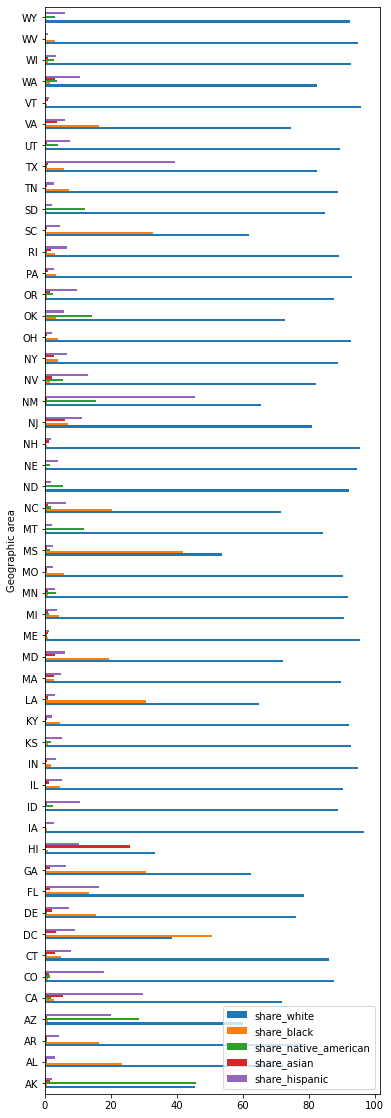

In [26]:
df_share_race_city.groupby('Geographic area').mean().plot(kind='barh', figsize=(6,20))

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

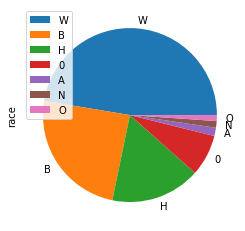

In [28]:
df_fatalities.race.value_counts().plot(kind='pie',
                                      legend=True)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [29]:
df_fatalities.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

<AxesSubplot:>

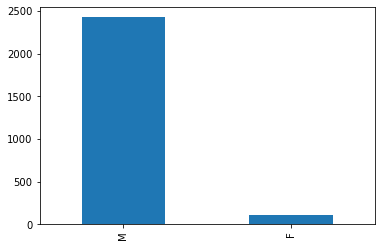

In [30]:
df_fatalities.gender.value_counts().plot(kind='bar')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [31]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False


<AxesSubplot:xlabel='gender,manner_of_death'>

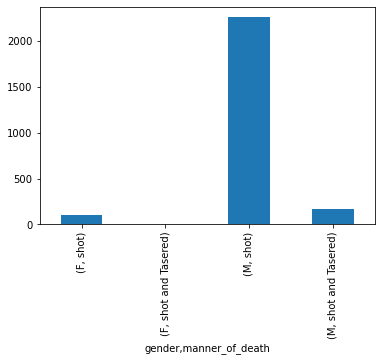

In [32]:
df_fatalities.groupby(['gender', 'manner_of_death']).id.count().plot(kind='bar')

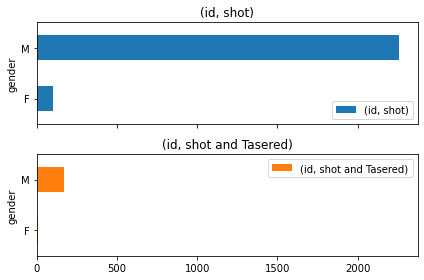

In [33]:
dfp = df_fatalities.pivot_table(index='gender',
                                columns='manner_of_death',
                                values=['id'],
                                aggfunc='count')

dfp.plot(kind='barh',
         subplots=True,
         rot=0,
         legend=True,
         stacked=True)

plt.tight_layout()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

<AxesSubplot:ylabel='armed'>

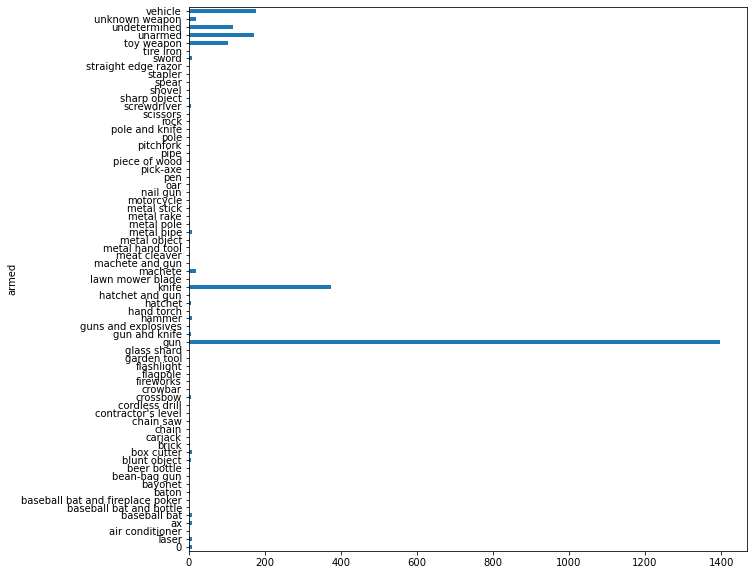

In [34]:
df_fatalities.groupby('armed').id.count().plot(kind='barh', figsize=(10,10))

In [35]:
unarmed_df = df_fatalities[df_fatalities.armed == 'unarmed']
armed_df = df_fatalities[df_fatalities.armed != 'unarmed']

In [36]:
print(f'{( unarmed_df.shape[0] / (df_fatalities.shape[0]) ) * 100}', '% of people were unarmed')

6.7455621301775155 % of people were unarmed


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:
below_25_df = df_fatalities[df_fatalities.age < 25]
over_25_df = df_fatalities[df_fatalities.age > 25]
print(f'{( below_25_df.shape[0] / (df_fatalities.shape[0]) ) * 100}', '% of people were below 25')

20.78895463510848 % of people were below 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<AxesSubplot:ylabel='Frequency'>

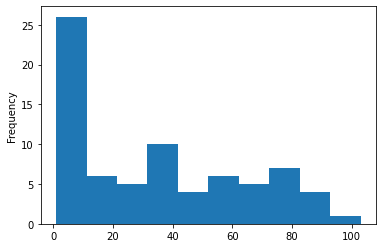

In [38]:
df_fatalities.groupby('age').id.count().plot(kind='hist')

<AxesSubplot:ylabel='Density'>

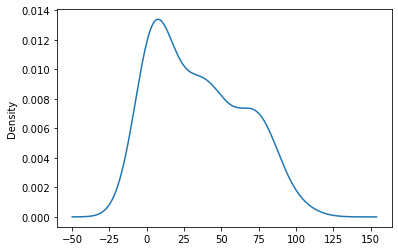

In [39]:
df_fatalities.groupby('age').id.count().plot( kind='kde')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

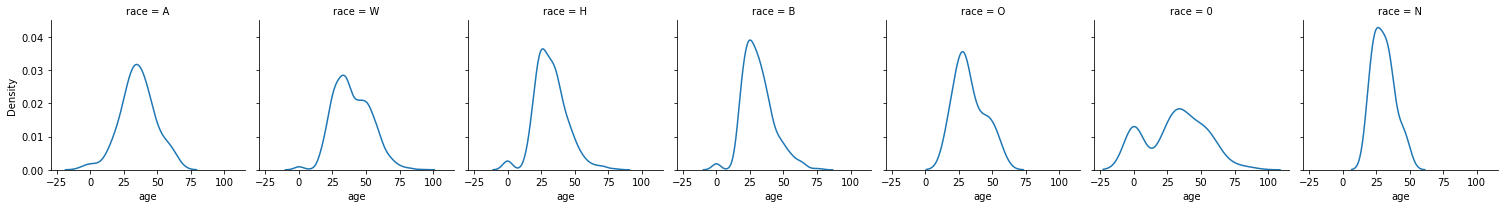

In [40]:
g = sns.FacetGrid(data=df_fatalities, col="race")
g.map(sns.kdeplot, "age")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

<AxesSubplot:>

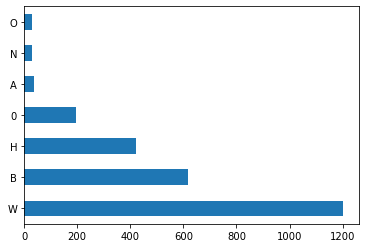

In [41]:
df_fatalities.race.value_counts().plot(kind='barh')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [42]:
ill_signals_count = df_fatalities.signs_of_mental_illness.value_counts()

In [43]:
print(ill_signals_count[1] / (ill_signals_count[1] + ill_signals_count[0]) * 100, '% of people had mental illness signal')

24.970414201183434 % of people had mental illness signal


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<AxesSubplot:>

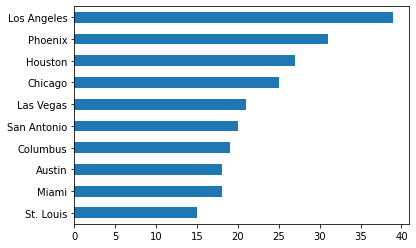

In [44]:
df_fatalities.city.value_counts()[:10][::-1].plot(kind='barh')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [45]:
df_fatalities.city.value_counts()[:10][::-1].index

Index(['St. Louis', 'Miami', 'Austin', 'Columbus', 'San Antonio', 'Las Vegas',
       'Chicago', 'Houston', 'Phoenix', 'Los Angeles'],
      dtype='object')

In [46]:
count=0
for city in df_fatalities.city.value_counts()[:10][::-1].index:
    share_race_by_city = df_share_race_city[df_share_race_city.City == f'{city} city'].copy()
    if count==0:
        share_race_top_10_city_df = share_race_by_city.copy()
    else:
        share_race_top_10_city_df = pd.concat([share_race_top_10_city_df, share_race_by_city])
    count +=1
share_race_top_10_city_df = share_race_top_10_city_df.reset_index()
share_race_top_10_city_df = share_race_top_10_city_df.drop('index', axis=1)

In [47]:
share_race_top_10_city_df.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,MI,St. Louis city,67.70,29.10,0.60,0.20,5.70
1,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50
2,FL,Miami city,72.60,19.20,0.30,1.00,70.00
3,MO,Miami city,97.70,0.60,0.00,0.00,1.70
4,OK,Miami city,68.90,1.30,17.10,0.50,4.80


<AxesSubplot:xlabel='City'>

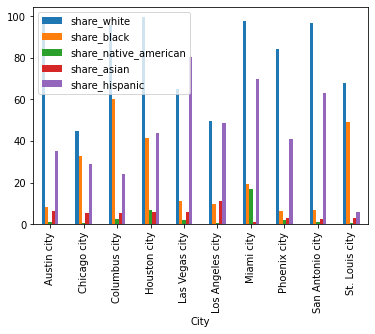

In [48]:
share_race_top_10_city_df.groupby('City').max().plot( kind='bar')

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [49]:
df_fatalities.state.value_counts()

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
IN     43
WI     43
KY     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

In [50]:
df_to_map = df_fatalities.groupby('state').count()

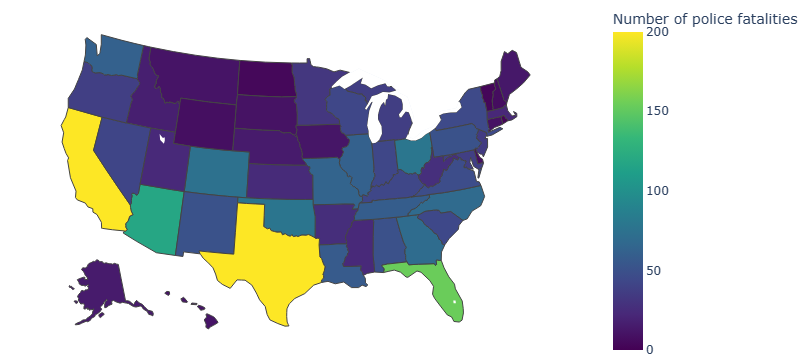

In [52]:
fig = px.choropleth(df_to_map, geojson=df_to_map.index, locations=df_to_map.index, color='id',
                           color_continuous_scale="Viridis",
                           range_color=(0, 200),
                           scope="usa",
                    locationmode="USA-states",
                           labels={'id':'Number of police fatalities'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [53]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [54]:
date_grouped_df = df_fatalities.groupby('date').count()

In [55]:
date_grouped_df['date'] = date_grouped_df.index

<AxesSubplot:xlabel='date', ylabel='Fatalities Count'>

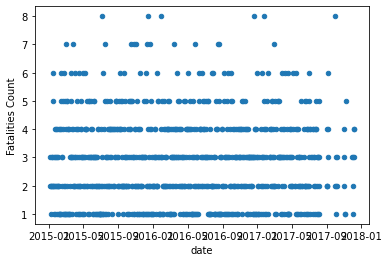

In [56]:
date_grouped_df.plot(kind='scatter', x='date', y='id', ylabel='Fatalities Count')

In [57]:
years = []
for date in date_grouped_df.date:
    year = date.strftime("%Y")
    years.append(year)
date_grouped_df['Year'] = years

<AxesSubplot:xlabel='Year', ylabel='Fatality Count'>

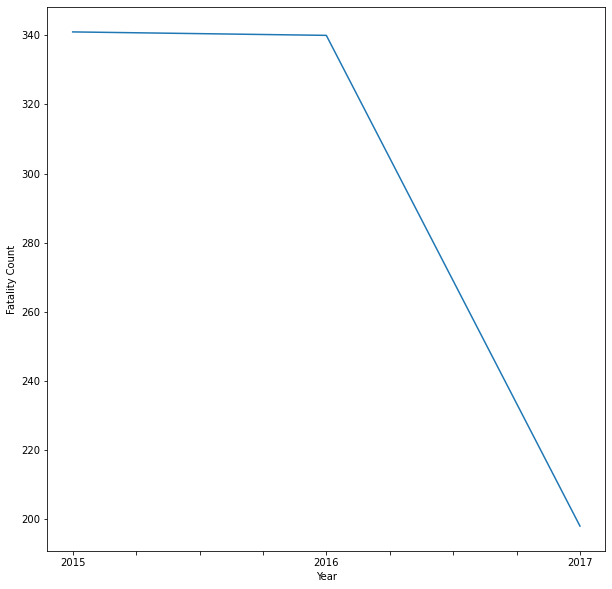

In [58]:
date_grouped_df.groupby('Year').count().plot(y='id', ylabel='Fatality Count', legend=False, figsize=(10,10))

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).